In [679]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # Ignorar alguns avisos

In [624]:
base_dados = pd.read_csv('unicorns till sep 2022.csv')

In [625]:
# Verificar Dimensão
base_dados.shape

(1186, 8)

In [626]:
# Primeiros Registros
base_dados.head()

,Id,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [627]:
# Colunas
base_dados.columns

Index(['Id', 'Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [628]:
# renomeando as colunas
base_dados.rename(columns= {
        'Company' : 'Companhia',
        'Valuation ($B)' : 'Valor ($)',
        'Date Joined' : 'Data de Adesão',
        'Country' : 'País',
        'City\xa0' : 'Cidade',
        'Industry' : 'Setor',
        'Investors' : 'Investidores',
            }, inplace=True # Alterando na Base de Dados origem
)

In [629]:
# Verificar o tipo da Informação
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              1186 non-null   int64 
 1   Companhia       1186 non-null   object
 2   Valor ($)       1186 non-null   object
 3   Data de Adesão  1186 non-null   object
 4   País            1186 non-null   object
 5   Cidade          1186 non-null   object
 6   Setor           1186 non-null   object
 7   Investidores    1168 non-null   object
dtypes: int64(1), object(7)
memory usage: 74.3+ KB


In [630]:
# Verificando dados Nullos
base_dados.isnull().sum()

,0
Id,0
Companhia,0
Valor ($),0
Data de Adesão,0
País,0
Cidade,0
Setor,0
Investidores,18


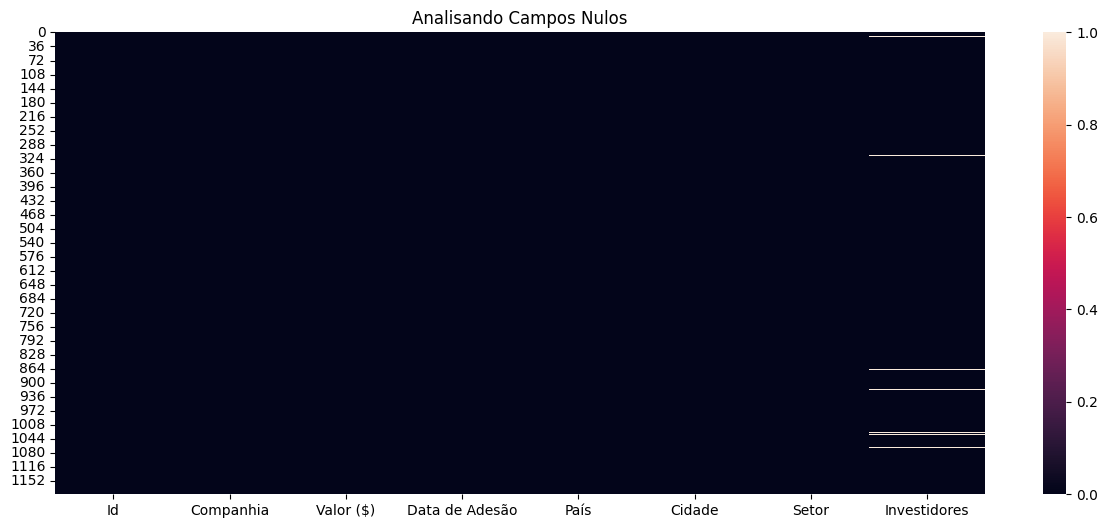

In [631]:
# Gráfico
plt.figure(figsize=(15,6))
plt.title('Analisando Campos Nulos')
sns.heatmap(base_dados.isnull());

In [632]:
# Campos Únicos
base_dados.nunique()

,0
Id,1186
Companhia,1183
Valor ($),222
Data de Adesão,695
País,48
Cidade,286
Setor,34
Investidores,1152


In [633]:
# Valores Únicos
base_dados['Setor'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [634]:
# Rank Valores Únicos
base_dados['Setor'].value_counts()

,count
Setor,
Fintech,239
Internet software & services,224
E-commerce & direct-to-consumer,103
Health,94
Artificial intelligence,74
Other,65
"Supply chain, logistics, & delivery",65
Cybersecurity,58
Data management & analytics,45


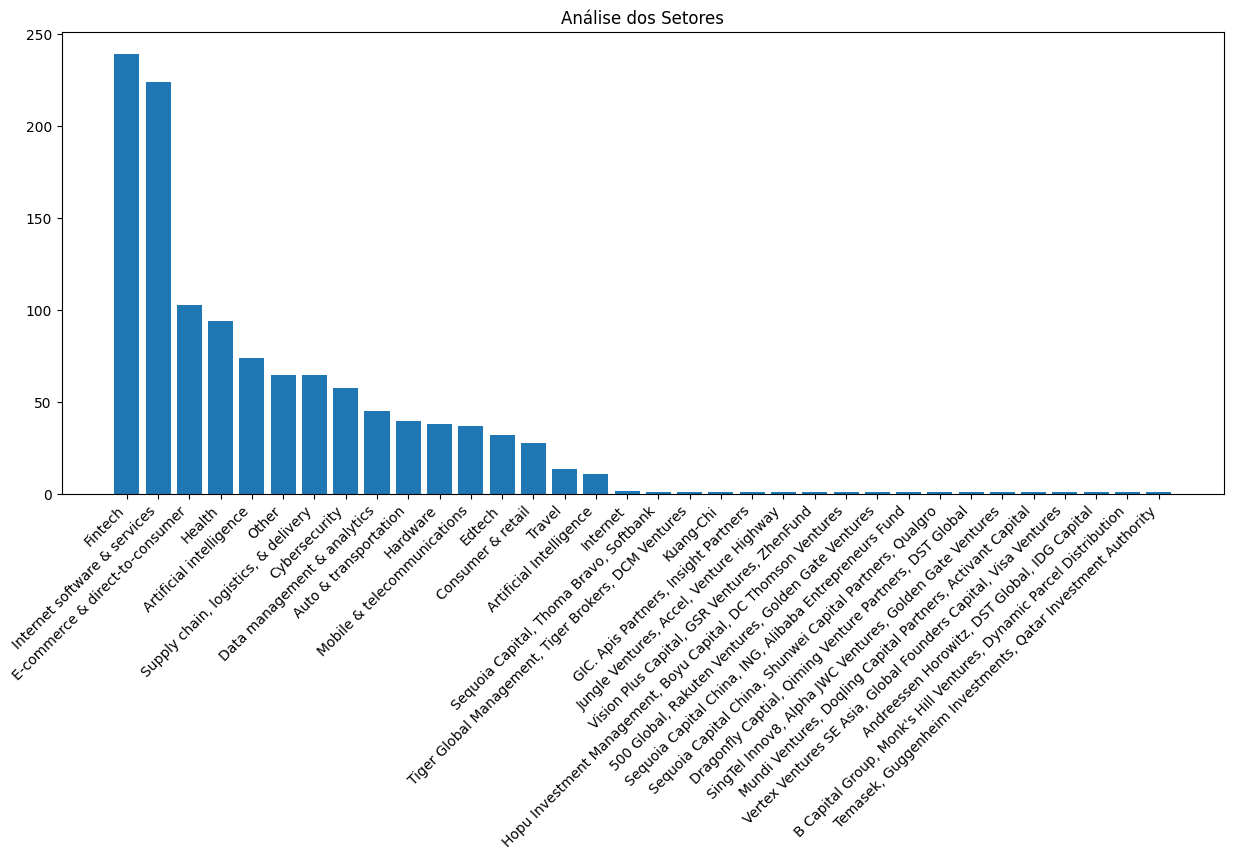

In [635]:
# Gráfico setores
plt.figure(figsize=(15,6))
plt.title('Análise dos Setores')
plt.bar(base_dados['Setor'].value_counts().index, base_dados['Setor'].value_counts());
plt.xticks(rotation=45, ha='right');

In [681]:
# Váriavel Países em porcentagem
analise_pais = base_dados['País'].value_counts( normalize=True ) * 100

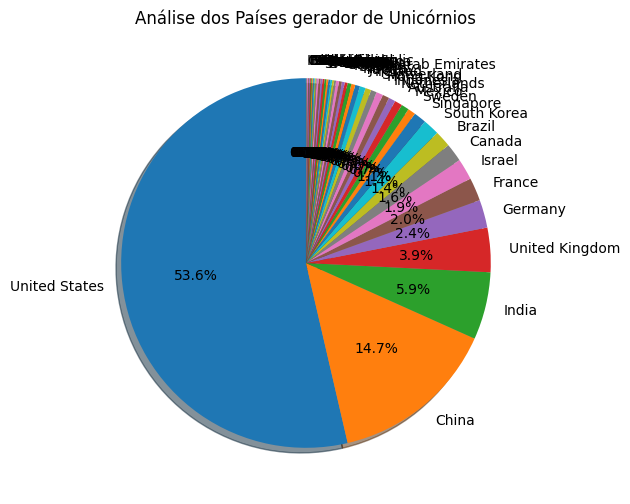

In [682]:
# Gráfico Países
plt.figure(figsize=(15,6))
plt.title('Análise dos Países gerador de Unicórnios')
plt.pie(
    analise_pais,
    labels = analise_pais.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
    );

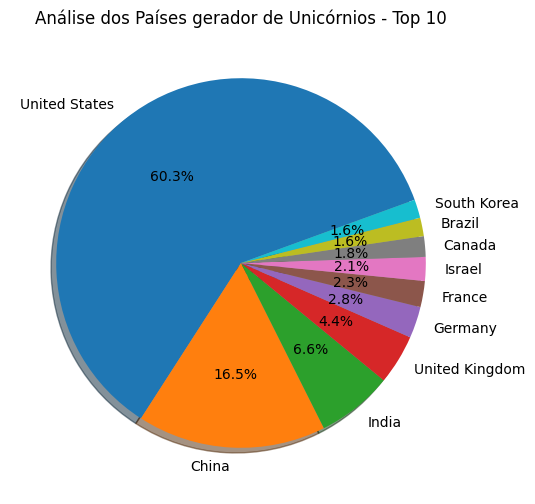

In [684]:
# Gráfico Países - Top 10
plt.figure(figsize=(15,6))
plt.title('Análise dos Países gerador de Unicórnios - Top 10')
plt.pie(
    analise_pais.head(10),
    labels = analise_pais.index[0:10],
    shadow=True,
    startangle=20, # alterei o angulo do startangle para que os nomes ficassem visiveis
    autopct='%1.1f%%'
);

In [639]:
# Conversão para Data
#base_dados['Data de Adesão'] = pd.to_datetime(base_dados['Data de Adesão'])

In [640]:
base_dados['Data de Adesão'].head()

,Data de Adesão
0,4/7/2017
1,12/1/2012
2,7/3/2018
3,1/23/2014
4,1/8/2018


In [641]:
# Extrair Ano e Mês
base_dados['Mes'] = pd.DatetimeIndex(base_dados['Data de Adesão']).month
base_dados['Ano'] = pd.DatetimeIndex(base_dados['Data de Adesão']).year
base_dados.head()

,Id,Companhia,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Mes,Ano
0,0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [642]:
# Tabela Analitica
analise_agrupada = base_dados.groupby( by=['País', 'Ano', 'Mes', 'Companhia']).count()['Id'].reset_index()
analise_agrupada.loc[
    analise_agrupada['País'] == 'Brazil'
]

,País,Ano,Mes,Companhia,Id
16,Brazil,2018,7,Movile,1
17,Brazil,2018,11,iFood,1
18,Brazil,2019,6,Loggi,1
19,Brazil,2019,9,QuintoAndar,1
20,Brazil,2019,10,EBANX,1
21,Brazil,2019,12,Wildlife Studios,1
22,Brazil,2020,1,Loft,1
23,Brazil,2020,12,C6 Bank,1
24,Brazil,2020,12,Creditas,1
25,Brazil,2021,1,MadeiraMadeira,1


In [643]:
# Conversão para Numérico
base_dados['Valor ($)'] = pd.to_numeric(base_dados['Valor ($)'].apply(lambda Linha: Linha.replace('$', '')))

In [644]:
base_dados.head()

,Id,Companhia,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Mes,Ano
0,0,ByteDance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,127.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,SHEIN,100.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [686]:
# Tabela Analitica
analise_pais = base_dados.groupby( by =['País'] ).sum()['Valor ($)'].reset_index()

In [716]:
analise_valor = analise_pais.sort_values('Valor ($)' ,ascending=False).head(20)
analise_valor

,País,Valor ($)
46,United States,2069.89
9,China,678.59
45,United Kingdom,205.45
20,India,202.92
18,Germany,80.88
17,France,58.42
1,Australia,54.40
7,Canada,49.23
23,Israel,48.02
6,Brazil,40.08


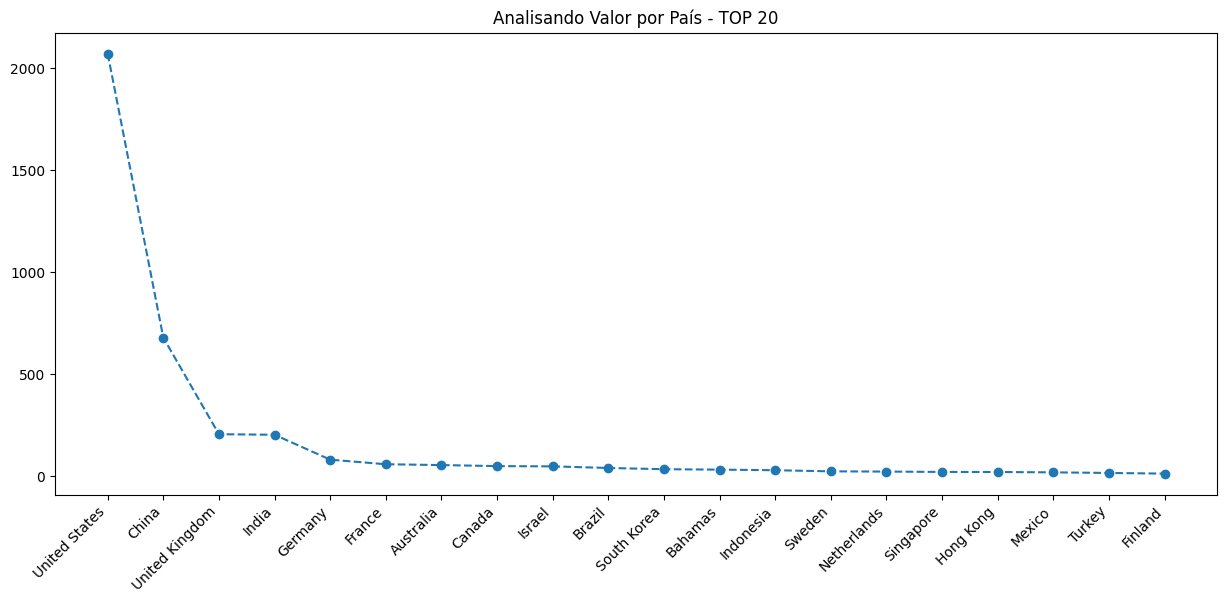

In [718]:
# Gráfico de Análise de Valor - TOP 20 Países
plt.figure(figsize=(15,6))
plt.title('Analisando Valor por País - TOP 20')
plt.plot(
    analise_valor['País'],
    analise_valor['Valor ($)'],
    marker='o',
    linestyle='--'
    );
plt.xticks(rotation=45, ha='right');